In [1]:
# Step 1: Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc
import joblib
import warnings
warnings.simplefilter(action = "ignore")

In [2]:
df = pd.read_csv('WISDM.csv')

In [3]:
df.head()

,33,Jogging,4.91E+13,-0.6946377,12.680544,0.50395286
0,33.0,Jogging,4.910000e+13,5.012288,11.264028,0.953424
1,33.0,Jogging,4.910000e+13,4.903325,10.882658,-0.081722
2,33.0,Jogging,4.910000e+13,-0.612916,18.496431,3.023717
3,33.0,Jogging,4.910000e+13,-1.184970,12.108489,7.205164
4,33.0,Jogging,4.910000e+13,1.375655,-2.492524,-6.510526


In [4]:
df.tail()



,33,Jogging,4.91E+13,-0.6946377,12.680544,0.50395286
1048570,7.0,Standing,2.090000e+14,-8.12,5.52,-0.80
1048571,7.0,Standing,2.090000e+14,-7.89,5.79,-0.72
1048572,7.0,Standing,2.090000e+14,-7.89,5.98,-0.27
1048573,7.0,Standing,2.090000e+14,-8.12,5.63,-0.89
1048574,7.0,Standing,2.090000e+14,-8.16,5.75,-1.12


In [5]:
df.describe()

,33,4.91E+13,-0.6946377,12.680544,0.50395286
count,1.048570e+06,1.048570e+06,1.048570e+06,1.048570e+06,1.048569e+06
mean,1.890269e+01,2.848919e+13,7.975415e-01,7.379899e+00,4.275560e-01
std,1.042573e+01,4.475025e+13,6.733030e+00,6.690979e+00,4.794074e+00
min,1.000000e+00,0.000000e+00,-1.961000e+01,-1.961000e+01,-1.980000e+01
25%,1.000000e+01,1.940000e+12,-2.640000e+00,3.340000e+00,-2.220117e+00
50%,2.000000e+01,8.540000e+12,3.800000e-01,8.050000e+00,0.000000e+00
75%,2.900000e+01,2.490000e+13,4.480000e+00,1.165000e+01,2.764931e+00
max,3.600000e+01,2.090000e+14,1.995000e+01,2.004000e+01,1.961000e+01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   33          1048570 non-null  float64
 1   Jogging     1048570 non-null  object 
 2   4.91E+13    1048570 non-null  float64
 3   -0.6946377  1048570 non-null  float64
 4   12.680544   1048570 non-null  float64
 5   0.50395286  1048569 non-null  float64
dtypes: float64(5), object(1)
memory usage: 48.0+ MB


In [7]:
columns = ['user', 'activity', 'time', 'x', 'y', 'z']

In [8]:
# Define column names
column_names = ['user', 'activity', 'time', 'x', 'y', 'z']

# Rename columns
df.columns = column_names

# Display the DataFrame
print(df)


         user  activity          time         x          y         z
0        33.0   Jogging  4.910000e+13  5.012288  11.264028  0.953424
1        33.0   Jogging  4.910000e+13  4.903325  10.882658 -0.081722
2        33.0   Jogging  4.910000e+13 -0.612916  18.496431  3.023717
3        33.0   Jogging  4.910000e+13 -1.184970  12.108489  7.205164
4        33.0   Jogging  4.910000e+13  1.375655  -2.492524 -6.510526
...       ...       ...           ...       ...        ...       ...
1048570   7.0  Standing  2.090000e+14 -8.120000   5.520000 -0.800000
1048571   7.0  Standing  2.090000e+14 -7.890000   5.790000 -0.720000
1048572   7.0  Standing  2.090000e+14 -7.890000   5.980000 -0.270000
1048573   7.0  Standing  2.090000e+14 -8.120000   5.630000 -0.890000
1048574   7.0  Standing  2.090000e+14 -8.160000   5.750000 -1.120000

[1048575 rows x 6 columns]


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   user      1048570 non-null  float64
 1   activity  1048570 non-null  object 
 2   time      1048570 non-null  float64
 3   x         1048570 non-null  float64
 4   y         1048570 non-null  float64
 5   z         1048569 non-null  float64
dtypes: float64(5), object(1)
memory usage: 48.0+ MB


In [10]:
print("Number of Rows = ",df.shape[0])

Number of Rows =  1048575


In [11]:
print("Number of Columns = ",df.shape[1])

Number of Columns =  6


In [12]:
# Perform one-hot encoding only on the 'activity' column
dummies = pd.get_dummies(df['activity'], prefix='activity')

In [13]:
merged = pd.concat([df, dummies],axis='columns')
print(merged)

         user  activity          time         x          y         z  \
0        33.0   Jogging  4.910000e+13  5.012288  11.264028  0.953424   
1        33.0   Jogging  4.910000e+13  4.903325  10.882658 -0.081722   
2        33.0   Jogging  4.910000e+13 -0.612916  18.496431  3.023717   
3        33.0   Jogging  4.910000e+13 -1.184970  12.108489  7.205164   
4        33.0   Jogging  4.910000e+13  1.375655  -2.492524 -6.510526   
...       ...       ...           ...       ...        ...       ...   
1048570   7.0  Standing  2.090000e+14 -8.120000   5.520000 -0.800000   
1048571   7.0  Standing  2.090000e+14 -7.890000   5.790000 -0.720000   
1048572   7.0  Standing  2.090000e+14 -7.890000   5.980000 -0.270000   
1048573   7.0  Standing  2.090000e+14 -8.120000   5.630000 -0.890000   
1048574   7.0  Standing  2.090000e+14 -8.160000   5.750000 -1.120000   

         activity_Downstairs  activity_Jogging  activity_Sitting  \
0                      False              True             False   

In [14]:
final = merged.drop(['activity'], axis='columns')

In [15]:
print(final)

         user          time         x          y         z  \
0        33.0  4.910000e+13  5.012288  11.264028  0.953424   
1        33.0  4.910000e+13  4.903325  10.882658 -0.081722   
2        33.0  4.910000e+13 -0.612916  18.496431  3.023717   
3        33.0  4.910000e+13 -1.184970  12.108489  7.205164   
4        33.0  4.910000e+13  1.375655  -2.492524 -6.510526   
...       ...           ...       ...        ...       ...   
1048570   7.0  2.090000e+14 -8.120000   5.520000 -0.800000   
1048571   7.0  2.090000e+14 -7.890000   5.790000 -0.720000   
1048572   7.0  2.090000e+14 -7.890000   5.980000 -0.270000   
1048573   7.0  2.090000e+14 -8.120000   5.630000 -0.890000   
1048574   7.0  2.090000e+14 -8.160000   5.750000 -1.120000   

         activity_Downstairs  activity_Jogging  activity_Sitting  \
0                      False              True             False   
1                      False              True             False   
2                      False              True     

In [16]:
# Replace False with 0 and True with 1
final = final.replace({False: 0, True: 1})

In [17]:
print(final)

         user          time         x          y         z  \
0        33.0  4.910000e+13  5.012288  11.264028  0.953424   
1        33.0  4.910000e+13  4.903325  10.882658 -0.081722   
2        33.0  4.910000e+13 -0.612916  18.496431  3.023717   
3        33.0  4.910000e+13 -1.184970  12.108489  7.205164   
4        33.0  4.910000e+13  1.375655  -2.492524 -6.510526   
...       ...           ...       ...        ...       ...   
1048570   7.0  2.090000e+14 -8.120000   5.520000 -0.800000   
1048571   7.0  2.090000e+14 -7.890000   5.790000 -0.720000   
1048572   7.0  2.090000e+14 -7.890000   5.980000 -0.270000   
1048573   7.0  2.090000e+14 -8.120000   5.630000 -0.890000   
1048574   7.0  2.090000e+14 -8.160000   5.750000 -1.120000   

         activity_Downstairs  activity_Jogging  activity_Sitting  \
0                          0                 1                 0   
1                          0                 1                 0   
2                          0                 1     

In [18]:
#DATA PRE-PROCESSING
# Two Types # 1) Imputation 2) Dropping

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
final.shape

(1048575, 11)

In [20]:
# This line of code shows that no of missing values in column

final.isnull().sum()

user                   5
time                   5
x                      5
y                      5
z                      6
activity_Downstairs    0
activity_Jogging       0
activity_Sitting       0
activity_Standing      0
activity_Upstairs      0
activity_Walking       0
dtype: int64

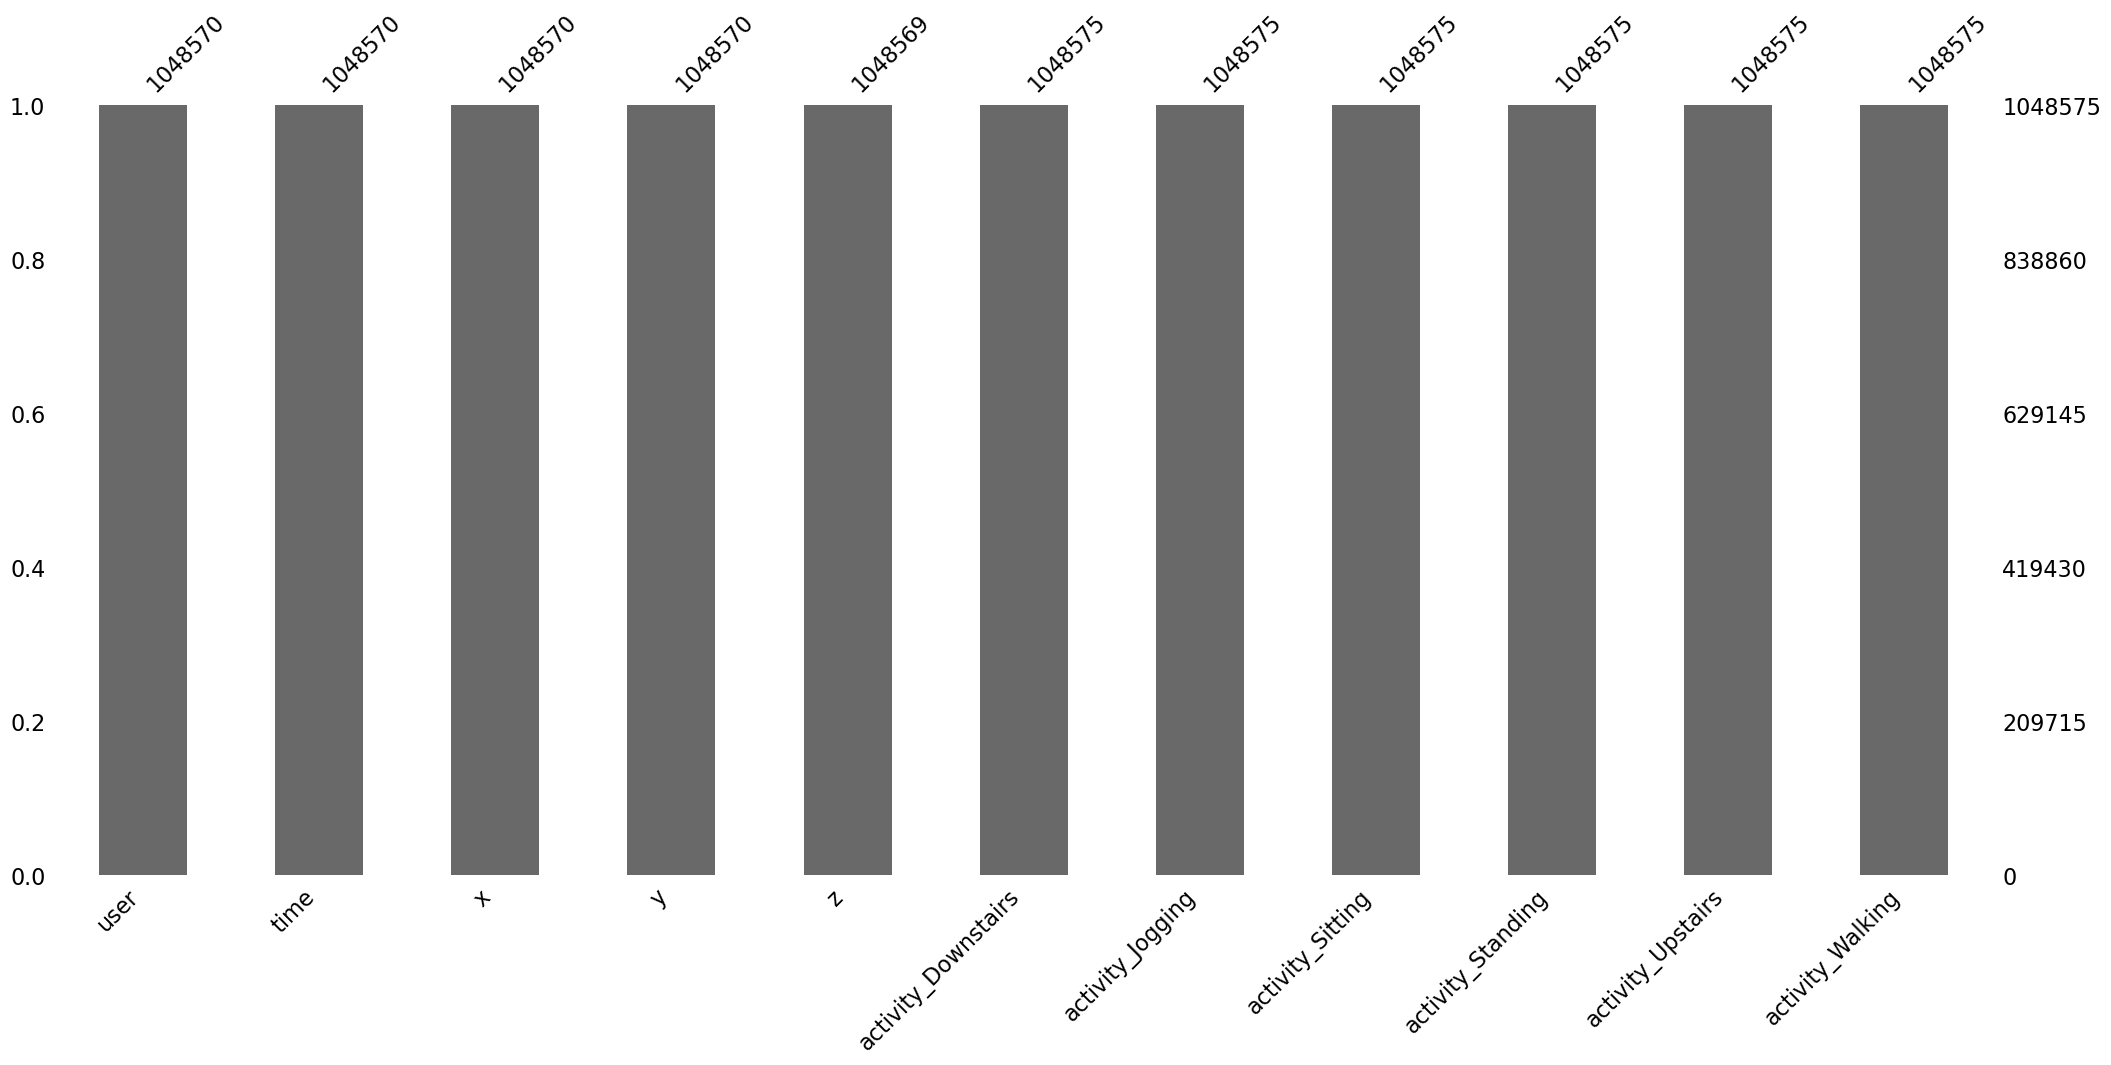

In [21]:
# Plotting
import missingno as msno
msno.bar(final);


In [22]:
#Handle missing using imputation
final['user'].fillna(final['user'].median(), inplace=True)

In [23]:
#Handle missing using imputation
final['time'].fillna(final['time'].median(), inplace=True)

In [24]:
#Handle missing using imputation
final['x'].fillna(final['x'].median(), inplace=True)

In [25]:
#Handle missing using imputation
final['y'].fillna(final['y'].median(), inplace=True)

In [26]:
#Handle missing using imputation
final['z'].fillna(final['z'].median(), inplace=True)

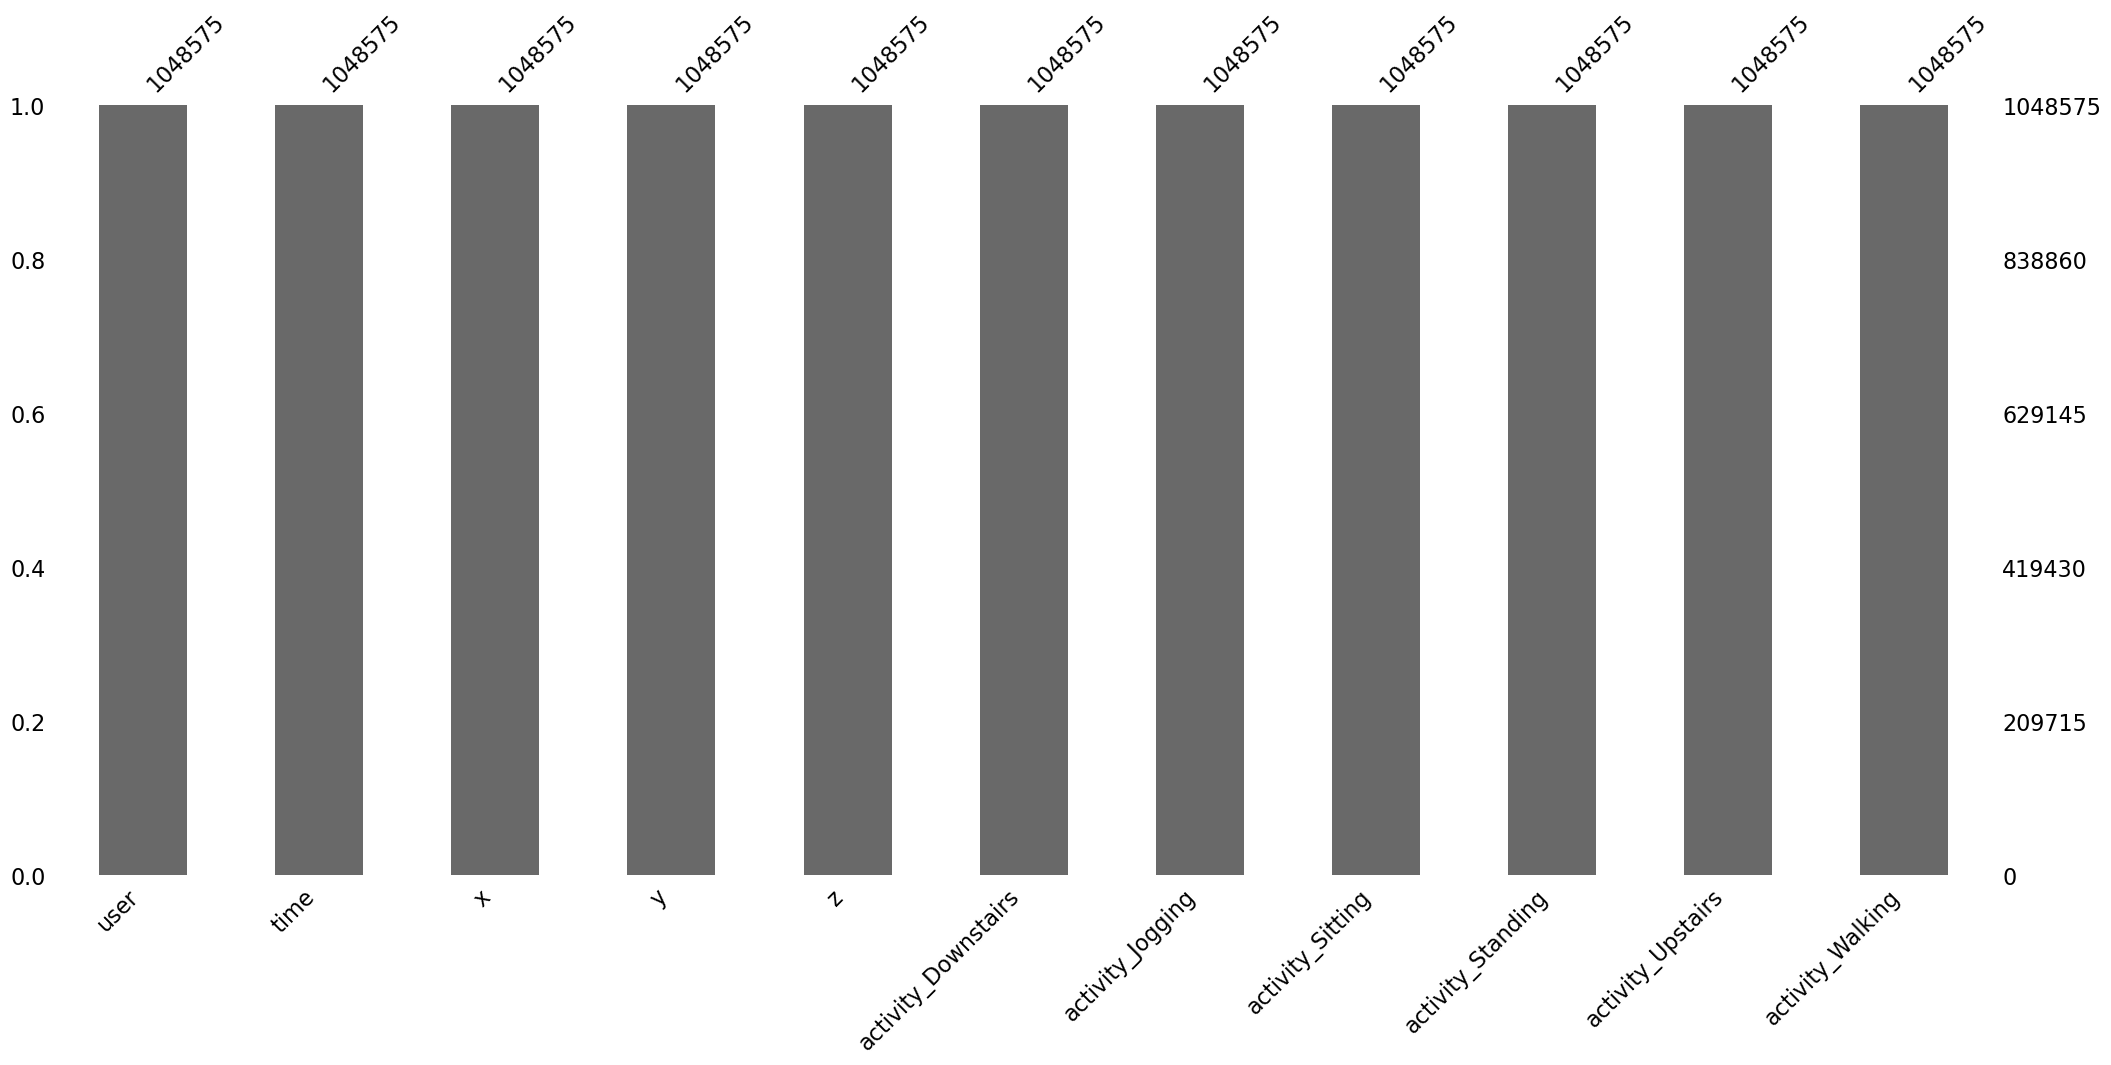

In [27]:
# Plotting
import missingno as msno
msno.bar(final);

In [28]:
#FEATURE SCALING 2 TYPES:
#DATA Normalization or Standardization
# (The process of Standardizing data to common format)
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.preprocessing import StandardScaler
print(final)

         user          time         x          y         z  \
0        33.0  4.910000e+13  5.012288  11.264028  0.953424   
1        33.0  4.910000e+13  4.903325  10.882658 -0.081722   
2        33.0  4.910000e+13 -0.612916  18.496431  3.023717   
3        33.0  4.910000e+13 -1.184970  12.108489  7.205164   
4        33.0  4.910000e+13  1.375655  -2.492524 -6.510526   
...       ...           ...       ...        ...       ...   
1048570   7.0  2.090000e+14 -8.120000   5.520000 -0.800000   
1048571   7.0  2.090000e+14 -7.890000   5.790000 -0.720000   
1048572   7.0  2.090000e+14 -7.890000   5.980000 -0.270000   
1048573   7.0  2.090000e+14 -8.120000   5.630000 -0.890000   
1048574   7.0  2.090000e+14 -8.160000   5.750000 -1.120000   

         activity_Downstairs  activity_Jogging  activity_Sitting  \
0                          0                 1                 0   
1                          0                 1                 0   
2                          0                 1     

In [29]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample data
data = final

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
normalized_data = scaler.fit_transform(data)

print("Original Data:")
print(data)
print("\nNormalized Data:")
print(normalized_data)

Original Data:
         user          time         x          y         z  \
0        33.0  4.910000e+13  5.012288  11.264028  0.953424   
1        33.0  4.910000e+13  4.903325  10.882658 -0.081722   
2        33.0  4.910000e+13 -0.612916  18.496431  3.023717   
3        33.0  4.910000e+13 -1.184970  12.108489  7.205164   
4        33.0  4.910000e+13  1.375655  -2.492524 -6.510526   
...       ...           ...       ...        ...       ...   
1048570   7.0  2.090000e+14 -8.120000   5.520000 -0.800000   
1048571   7.0  2.090000e+14 -7.890000   5.790000 -0.720000   
1048572   7.0  2.090000e+14 -7.890000   5.980000 -0.270000   
1048573   7.0  2.090000e+14 -8.120000   5.630000 -0.890000   
1048574   7.0  2.090000e+14 -8.160000   5.750000 -1.120000   

         activity_Downstairs  activity_Jogging  activity_Sitting  \
0                          0                 1                 0   
1                          0                 1                 0   
2                          0        

Class distribution before SMOTE:
Class=1, n=325974 (31.087%)
Class=5, n=406776 (38.793%)
Class=4, n=118589 (11.310%)
Class=0, n=97818 (9.329%)
Class=2, n=54876 (5.233%)
Class=3, n=44542 (4.248%)

Class distribution after SMOTE:
Class=1, n=406776 (16.667%)
Class=5, n=406776 (16.667%)
Class=4, n=406776 (16.667%)
Class=0, n=406776 (16.667%)
Class=2, n=406776 (16.667%)
Class=3, n=406776 (16.667%)


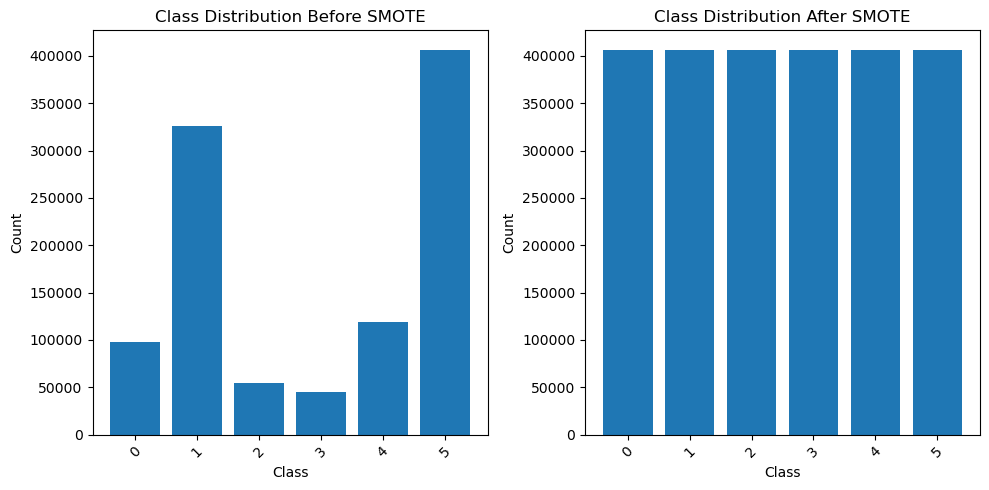

In [30]:
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Sample data
data = final

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
normalized_data = scaler.fit_transform(data)

# Assuming normalized_data contains your features and one-hot encoded labels
X = normalized_data[:, :-6]  # Assuming the last 6 columns are the one-hot encoded labels
y = normalized_data[:, -6:]  # Assuming the last 6 columns are the one-hot encoded labels

# Convert one-hot encoded labels to integers
y_encoded = []
for label in y:
    y_encoded.append(label.argmax())

# Summarize distribution before applying SMOTE
counter_before = Counter(y_encoded)
print("Class distribution before SMOTE:")
for label, count in counter_before.items():
    per = count / len(y_encoded) * 100
    print(f'Class={label}, n={count} ({per:.3f}%)')

# Plot the distribution before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
labels_before = [label for label in counter_before.keys()]
plt.bar(labels_before, counter_before.values())
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before SMOTE')

# Apply SMOTE to oversample the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Summarize distribution after applying SMOTE
counter_after = Counter(y_resampled)
print("\nClass distribution after SMOTE:")
for label, count in counter_after.items():
    per = count / len(y_resampled) * 100
    print(f'Class={label}, n={count} ({per:.3f}%)')

# Plot the distribution after SMOTE
plt.subplot(1, 2, 2)
labels_after = [label for label in counter_after.keys()]
plt.bar(labels_after, counter_after.values())
plt.xticks(rotation=45)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After SMOTE')

plt.tight_layout()
plt.show()


In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)


KNN Accuracy: 0.8789159489646243

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     81053
           1       0.88      0.83      0.85     81119
           2       1.00      1.00      1.00     81591
           3       0.99      1.00      1.00     81439
           4       0.79      0.84      0.81     81137
           5       0.86      0.74      0.80     81793

    accuracy                           0.88    488132
   macro avg       0.88      0.88      0.88    488132
weighted avg       0.88      0.88      0.88    488132


Confusion Matrix:
[[70476  1645    19   245  6611  2057]
 [ 4639 67135    41    31  3952  5321]
 [    9     5 81555    19     3     0]
 [   96     0     4 81276    58     5]
 [ 8669  2290    12   229 67787  2150]
 [ 8473  5228     8    75  7211 60798]]


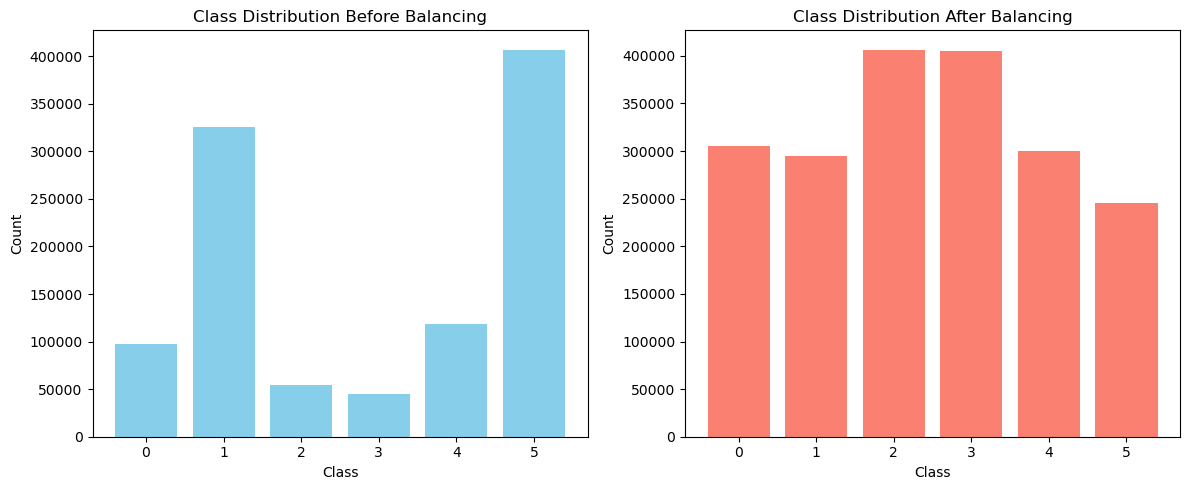

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from imblearn.combine import SMOTEENN

# Sample data
data = final

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
normalized_data = scaler.fit_transform(data)

# Split the data into features and labels
X = normalized_data[:, :-6]  # Assuming the last 6 columns are labels
y = normalized_data[:, -6:]  # Assuming the last 6 columns are labels

# Compute class distribution before applying LoRAS
counter_before = Counter(np.argmax(y, axis=1))
labels_before, counts_before = zip(*counter_before.items())

# Apply LoRAS to balance the dataset
smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X, np.argmax(y, axis=1))

# Compute class distribution after applying LoRAS
counter_after = Counter(y_resampled)
labels_after, counts_after = zip(*counter_after.items())

# Plot class distribution before and after
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(labels_before, counts_before, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before Balancing')

plt.subplot(1, 2, 2)
plt.bar(labels_after, counts_after, color='salmon')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After Balancing')

plt.tight_layout()
plt.show()


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_resampled and y_resampled are your balanced features and labels

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)


KNN Accuracy: 0.9725301389456478

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     60703
           1       0.98      0.97      0.98     59210
           2       1.00      1.00      1.00     81210
           3       1.00      1.00      1.00     81236
           4       0.94      0.95      0.94     60214
           5       0.97      0.94      0.95     48947

    accuracy                           0.97    391520
   macro avg       0.97      0.97      0.97    391520
weighted avg       0.97      0.97      0.97    391520


Confusion Matrix:
[[57842   275     9    65  1944   568]
 [  734 57579    11     4   518   364]
 [    4     1 81197     8     0     0]
 [   32     0     1 81181    22     0]
 [ 2285   362     0    73 57037   457]
 [ 1526   279     1    20  1192 45929]]


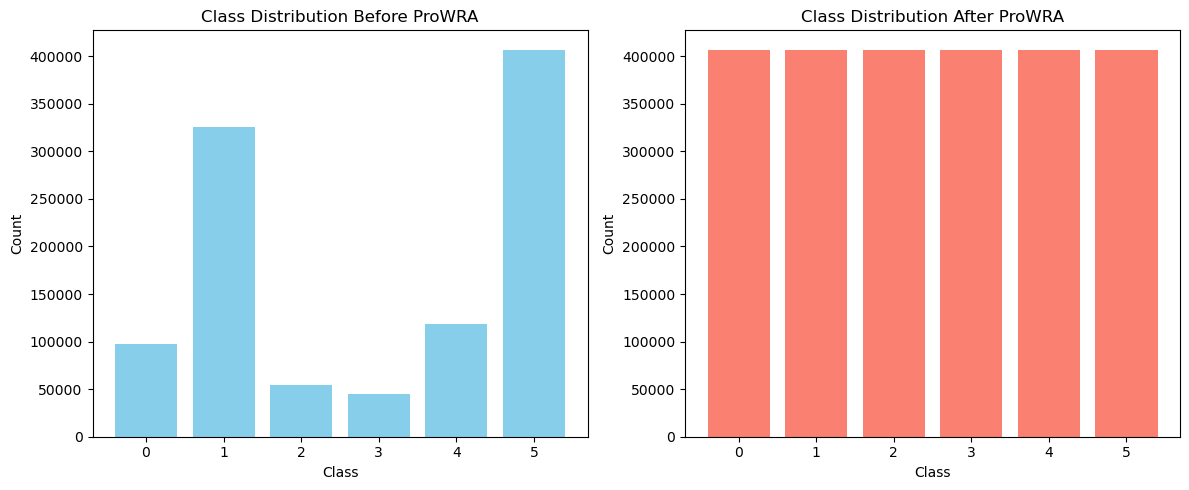

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.metrics import classification_report_imbalanced

# Sample data
data = final

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform it
normalized_data = scaler.fit_transform(data)

# Split the data into features and labels
X = normalized_data[:, :-6]  # Assuming the last 6 columns are labels
y = normalized_data[:, -6:]  # Assuming the last 6 columns are labels

# Compute class distribution before applying ProWRA
counter_before = Counter(np.argmax(y, axis=1))
labels_before, counts_before = zip(*counter_before.items())

# Define the ProWRA pipeline
prowra_pipeline = Pipeline([
    ('sampling', SMOTE()),  # Over-sampling with SMOTE
    ('under_sampling', RandomUnderSampler()),  # Under-sampling with RandomUnderSampler
])

# Apply ProWRA to balance the dataset
X_resampled, y_resampled = prowra_pipeline.fit_resample(X, np.argmax(y, axis=1))

# Compute class distribution after applying ProWRA
counter_after = Counter(y_resampled)
labels_after, counts_after = zip(*counter_after.items())

# Plot class distribution before and after ProWRA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(labels_before, counts_before, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution Before ProWRA')

plt.subplot(1, 2, 2)
plt.bar(labels_after, counts_after, color='salmon')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution After ProWRA')

plt.tight_layout()
plt.show()


In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming X_resampled and y_resampled are your balanced features and labels

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the KNN classifier
knn_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
print("\nConfusion Matrix:")
print(cm)

KNN Accuracy: 0.8790265747789532

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81     81610
           1       0.88      0.83      0.85     81259
           2       1.00      1.00      1.00     81251
           3       0.99      1.00      1.00     81434
           4       0.80      0.83      0.81     81319
           5       0.86      0.75      0.80     81259

    accuracy                           0.88    488132
   macro avg       0.88      0.88      0.88    488132
weighted avg       0.88      0.88      0.88    488132


Confusion Matrix:
[[71059  1626    19   254  6465  2187]
 [ 4754 67138    24    23  3878  5442]
 [   12     3 81218    16     2     0]
 [  116     0     7 81241    67     3]
 [ 8682  2274    14   254 67845  2250]
 [ 8397  5144    11    76  7051 60580]]
